# Analyzing Performance

## Using Linux built-in performance measurement tools

One of the most prolific tools (as you may have read in the textbook) is the `time` ([man page](https://man7.org/linux/man-pages/man1/time.1.html)) tool built into Linux and BSD (amongst other operating systems), usually located at `/usr/bin/time`.  To run `/usr/bin/time`, simply just add it on the same line where you call `python` or your compiled program at the beginning of the line in your `%%qsub` cells.  

Note that it will print, by default: the CPU usage by the program code (user), the CPU usage by the system (system), the Wall time (elapsed), the percentage of CPU used, and different information about the RAM usage.

You can customize it yourself by feeding the `--format="..."` parameters, by replacing the ellipsis with a printf-style format string.

For instance, if we want to time the program `sleep 5`, with the format string `"real %e system %S cpu %P avg_ram_kb %K"`, our line would look like:

`/usr/bin/time --format="real %e system %S cpu %P avg_ram_kb %K" sleep 5`

**NOTE**: The output from this tool will appear in the error buffer instead (`STDIN.eNNNNNN`), so make sure you look for through both the standard output and the standard error files.  Make sure to look through the `STDIN.oNNNNN` file too, so that you have the job number and can know which run was with which parameters.

Try using this tool on your code in the following cells!

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [6]:
for z in range(7):
    time.sleep(5)
    
    Current = time.time()
    Now = time.ctime()
    print("Current time:", Now)
    print(z)
    print(Current, "= Time in seconds")
    # Print current time in seconds

Current time: Wed May 18 19:23:55 2022
0
1652927035.1664615 = Time in seconds
Current time: Wed May 18 19:24:00 2022
1
1652927040.1718235 = Time in seconds
Current time: Wed May 18 19:24:05 2022
2
1652927045.1771023 = Time in seconds
Current time: Wed May 18 19:24:10 2022
3
1652927050.182407 = Time in seconds
Current time: Wed May 18 19:24:15 2022
4
1652927055.1877706 = Time in seconds
Current time: Wed May 18 19:24:20 2022
5
1652927060.1930957 = Time in seconds
Current time: Wed May 18 19:24:25 2022
6
1652927065.1983733 = Time in seconds


In [7]:
import psutil

print(psutil.cpu_percent())
print(psutil.cpu_stats())
print(psutil.cpu_freq())
# Print percent of CPU Usage, statistic about the system memory, and frequency of the CPU.

0.5
scpustats(ctx_switches=849699515884, interrupts=14179796481, soft_interrupts=11554556505, syscalls=0)
scpufreq(current=1.2163333333333328, min=1200.0, max=3700.0)


## Collecting run data

To make sure that we have adequate data, make sure to submit at least 10 different variations of your code, such as the following example variations (based on the Monte Carlo example):

1. Run with draw number size 10000000 and 2 workers
1. Run with draw number size 10000000 and 4 workers
1. Run with draw number size 10000000 and 6 workers
1. Run with draw number size 10000000 and 8 workers
1. Run with draw number size 10000000 and 10 workers
1. Run with draw number size 10000000 and 12 workers
1. Run with draw number size 10000000 and 14 workers
1. Run with draw number size 10000000 and 16 workers
1. Run with draw number size 100000000 and 8 workers
1. Run with draw number size 100000000 and 16 workers
1. Run with draw number size 1000000000 and 8 workers
1. Run with draw number size 1000000000 and 16 workers
1. Run with draw number size 10000000000 and 8 workers
1. Run with draw number size 10000000000 and 16 workers

Now, go ahead and use the two cells below to run your job for different variations (you can either programmatically run the variations or just manually run each variation here and just note the data down).

In [1]:
import cfxmagic

In [2]:
!qstat

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1909505.v-qsvr-1           ...ub-singleuser u134923         00:00:33 R jupyterhub     


We can also submit to different types of machines.  The Intel(R) Core(tm) processors differ in specifications from the Intel(R) Xeon(tm) processors.  To switch between the Intel Core nodes and the Intel Xeon nodes, simply just call `qsub` with different node properties as shown:

In [3]:
%%qsub -l nodes=1:core:ppn=2
cd $PBS_O_WORKDIR
/usr/bin/time python ParallelCode.py

1909637.v-qsvr-1.aidevcloud



In [4]:
%%qsub -l nodes=1:xeon:ppn=2
cd $PBS_O_WORKDIR
/usr/bin/time python ParallelCode.py

1909638.v-qsvr-1.aidevcloud



## Generating plots

We would like to generate plots using the data we collected above.  Optimally, we'd generate data files that we could just simply import and plot, but for this time, it's okay to just create lists of data manually as this isn't really a class on data analysis.

A nice video explaining plotting in Jupyter notebooks is available at: https://www.youtube.com/watch?v=Hr4yh1_4GlQ

Practice by plotting the number of workers (or another variable, such as data draw size) against a response (such as wall time, cpu time, memory usage, etc.):

In [5]:
import numpy as np
import matplotlib.pyplot as plt

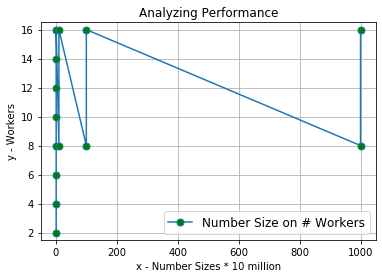

In [22]:
x1 = [1,1,1,1,1,1,1,1,10,10,100,100,1000,1000]
y1 = [2,4,6,8,10,12,14,16,8,16,8,16,8,16]
plt.plot(x1, y1, marker = 'o', markerfacecolor = 'green', markersize=7, label = 'Number Size on # Workers')

plt.xlabel('x - Number Sizes * 10 million')
plt.ylabel('y - Workers')
plt.ylim(1.5,16.5)
plt.title('Analyzing Performance')
plt.legend(loc = 'best', fontsize = 12)
plt.grid()

## Presenting data/plots inline with Markdown text

Now that you have your data and know how to plot your data, create Markdown and code cells below to answer the following questions in report format (incorporating the code cells to generate plots):

1. What software application did you choose to attempt to parallelize or augment?
2. How did you parallelize or augment your chosen software application?
3. How did the throughput or latency of your software application change as you increased the number of resources (workers, CPUs, etc.)?
4. Were there any differences between the Linux system performance measurement tools and your language-based measurement tools?  What may be the cause of that?
5. What would you change if you were to attempt this project again?

In [8]:
import datetime
x1 = "Markdown Test"
author = "Kelvin Duong"
date = datetime.date.today()

x= x1.title()

print(x)
print(author)
print(date)

Markdown Test
Kelvin Duong
2022-05-17


1. What software application did you choose to attempt to parallelize or augment?

Answer: The application I use to parallelized the program is C++ Compiler and Visual Studio Code, while using Jupyter Notebook to augment the various code cell in this same program.

2. How did you parallelize or augment your chosen software application?

Answer: For parallelize, I run multiple tests through Visual Studio Code, Command Terminal, and probably Jupyter as well, and make it run parallelly in different processors/times.  For augment, I just simply edit or adjust the code cell to match with the program I want to run in.

3. How did the throughput or latency of your software application change as you increased the number of resources (workers, CPUs, etc.)?

Answer: The throughput is increase by changing the hardware setting (horizontal scaling), or increasing the capacity and performance of the existing hardware I running the application within Linux, or other(vertical scaling).

4. Were there any differences between the Linux system performance measurement tools and your language-based measurement tools? What may be the cause of that?

Answer: The Linux is an open source operating system. An operating system is the software that directly manages a system's hardware and resources, like CPU, memory, storage, and etc. The operating system is between the applications and hardware, and makes the connections between all of the software and the physical resources that do the work.  While in the language programs like Task Manager and Performance Monitor for Windows-based systems during this project are for Unix-based systems.

5. What would you change if you were to attempt this project again?

Answer:  I would some additional information on various topics/tasks as well a clearer explanations on various important keywords and tasks.

## Including Plots
This is the plot design I created, previous task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

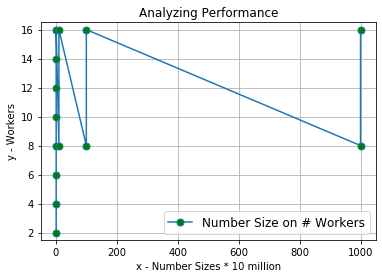

In [2]:
x1 = [1,1,1,1,1,1,1,1,10,10,100,100,1000,1000]
y1 = [2,4,6,8,10,12,14,16,8,16,8,16,8,16]
plt.plot(x1, y1, marker = 'o', markerfacecolor = 'green', markersize=7, label = 'Number Size on # Workers')

plt.xlabel('x - Number Sizes * 10 million')
plt.ylabel('y - Workers')
plt.ylim(1.5,16.5)
plt.title('Analyzing Performance')
plt.legend(loc = 'best', fontsize = 12)
plt.grid()